### Exploratory Data Analysis (EDA)

Assumptions:
    1. Only *.csv files are currently being read.
    2. Target columns are placed after the features in the *.csv
    3. Median imputing is performed where needed. Change it appropriately as needed.

### Source Data
    1. https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset
    2. Original Data Size: 12 Features x 1 Target x 310 Samples

### Objectives

    1. To get an insight into input dataframe.
    2. To get an understanding of basic statistics.
    3. Identify features of importance through VIF & PCA

#### Libraries

In [1]:
# Import relevant libraries

import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns

import ppscore as pps

from tabulate import tabulate
tabulate.PRESERVE_WHITESPACE = False

from pca import pca
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA as SKLPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### Meta Variables

In [2]:
RND_STATE = 39  # random_state where used is assigned RND_STATE

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True) # Custom Color Scheme
huecol = ['Class_att'] # Recommended for using with Classification Dataset.

#### I/O Path

In [3]:
PATH = r"C:\DSML_Case_Studies\01_Classification\01_Dataset"
OUTPATH = r"C:\DSML_Case_Studies\01_Classification\03_Output"
DATASET = r"\Dataset_Lower_Back_Pain_12x1.csv"
PREFIX = r"\EDA_V1.1_LowerBackPain_"

# Specify number of features and targets

n_features = 12
n_target = 1

#### Dataframe Construction

In [4]:
# Dataframe Definition & Classifying Features & Targets

df = pd.read_csv(f"{PATH}{DATASET}")
df.drop_duplicates(inplace=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.round(decimals=4)

DF_INFO = df.dtypes.to_frame('Data Type').reset_index()

collst = []
for columns in df.columns:
    collst.append(columns)

featlst = collst[0:len(collst)-n_target]
targlst = collst[-n_target:]

cat_df = df.select_dtypes(include=['object'])
catlst = []
for col in cat_df.columns:
    catlst.append(col)

y_catlst = [value for value in catlst if value in targlst]

In [5]:
print("Dataframe BEFORE Encoding: ")

Dataframe BEFORE Encoding: 


In [6]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,66.2854,26.3278,47.5000,39.9575,121.2197,-0.7996,0.6476,9.0466,10.2636,13.5035,1.1381,34.3683,Patient
1,32.0910,6.9894,35.9982,25.1016,132.2647,6.4134,0.8727,24.4626,11.6395,11.0045,-16.4073,38.8912,Patient
2,54.9510,5.8654,53.0000,49.0856,126.9703,-0.6316,0.7777,16.7774,10.5263,16.4625,-31.9370,22.1518,Normal
3,49.7821,6.4668,53.0000,43.3153,110.8648,25.3356,0.3347,17.6515,11.7040,16.2624,-0.8956,38.4719,Patient
4,84.9990,29.6101,83.3522,55.3889,126.9130,71.3212,0.9988,7.0551,9.0119,9.8554,-19.3141,43.0086,Patient


#### Encoding Categorical Columns

In [7]:
# Encode Categorical Columns

for i in range(0, len(collst), 1):
    temp = df.dtypes[collst[i]]
    if temp == 'object':
        df[collst[i]] = df[collst[i]].astype('category')
        df[collst[i]] = df[collst[i]].cat.codes
    else:
        continue

In [8]:
print("Dataframe AFTER Encoding: ")

Dataframe AFTER Encoding: 


In [9]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,66.2854,26.3278,47.5000,39.9575,121.2197,-0.7996,0.6476,9.0466,10.2636,13.5035,1.1381,34.3683,1
1,32.0910,6.9894,35.9982,25.1016,132.2647,6.4134,0.8727,24.4626,11.6395,11.0045,-16.4073,38.8912,1
2,54.9510,5.8654,53.0000,49.0856,126.9703,-0.6316,0.7777,16.7774,10.5263,16.4625,-31.9370,22.1518,0
3,49.7821,6.4668,53.0000,43.3153,110.8648,25.3356,0.3347,17.6515,11.7040,16.2624,-0.8956,38.4719,1
4,84.9990,29.6101,83.3522,55.3889,126.9130,71.3212,0.9988,7.0551,9.0119,9.8554,-19.3141,43.0086,1


In [10]:
print("Dataframe BEFORE Imputing: ")

Dataframe BEFORE Imputing: 


In [11]:
print(df.isnull().sum(), end='\n\n')

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64



#### Missing Data Imputation

In [12]:
# Basic Imputing

''' Use Appropriate Imputer - Mean, Meadian, Mode... Others '''

df = df.apply(lambda x: x.fillna(x.median()), axis=0)


In [13]:
print("Dataframe AFTER MEDIAN Imputing: ")

Dataframe AFTER MEDIAN Imputing: 


In [14]:
print(df.isnull().sum(), end='\n\n')

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64



In [15]:
# Sanity checks before proceeding further

print("List of Features:", featlst, end='\n\n')
print("List of Targets:", targlst, end='\n\n')
print("List of Categorical Variables:", catlst, end='\n\n')
print("List of Categorical Targets", y_catlst, end='\n\n')

List of Features: ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']

List of Targets: ['Class_att']

List of Categorical Variables: ['Class_att']

List of Categorical Targets ['Class_att']



#### Descriptive Statistics

In [16]:
print("Descriptive Stats: ")

Descriptive Stats: 


In [17]:
desc_stat = df.describe().T.round(3) # Univariate analyses
print(tabulate(desc_stat, headers=desc_stat.columns, tablefmt="github", numalign="right"))

|                          |   count |    mean |    std |     min |     25% |     50% |     75% |     max |
|--------------------------|---------|---------|--------|---------|---------|---------|---------|---------|
| pelvic_incidence         |     310 |  60.497 | 17.237 |  26.148 |   46.43 |  58.691 |  72.878 | 129.834 |
| pelvic_tilt              |     310 |  17.543 | 10.008 |  -6.555 |  10.667 |  16.358 |   22.12 |  49.432 |
| lumbar_lordosis_angle    |     310 |  51.931 | 18.554 |      14 |      37 |  49.562 |      63 | 125.742 |
| sacral_slope             |     310 |  42.954 | 13.423 |  13.367 |  33.347 |  42.405 |  52.696 |  121.43 |
| pelvic_radius            |     310 | 117.921 | 13.317 |  70.083 | 110.709 | 118.268 | 125.468 | 163.071 |
| degree_spondylolisthesis |     310 |  26.297 | 37.559 | -11.058 |   1.604 |  11.768 |  41.287 | 418.543 |
| pelvic_slope             |     310 |   0.473 |  0.286 |   0.003 |   0.224 |   0.476 |   0.705 |   0.999 |
| Direct_tilt              |

#### Count, Q-Q & Box Plots

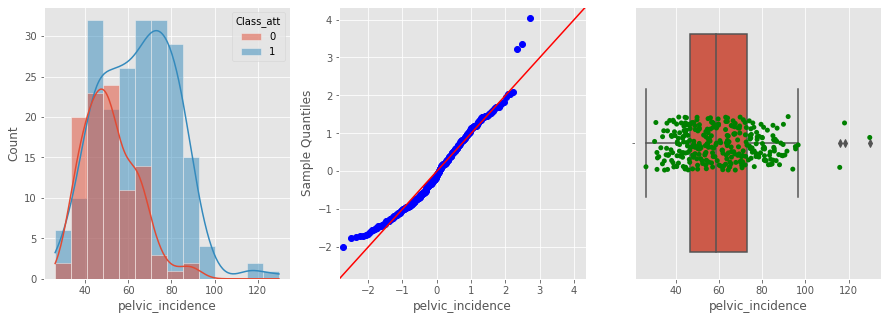

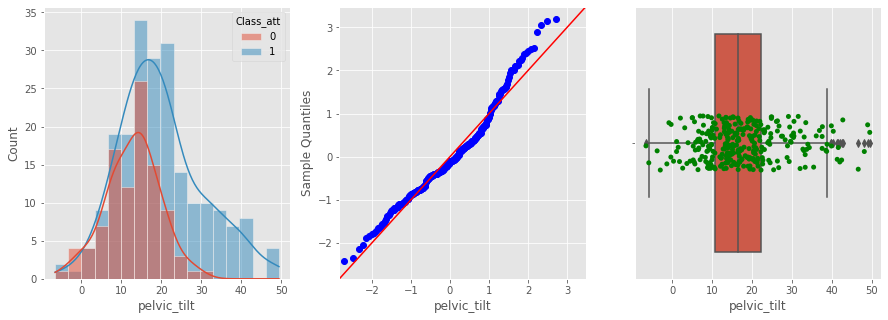

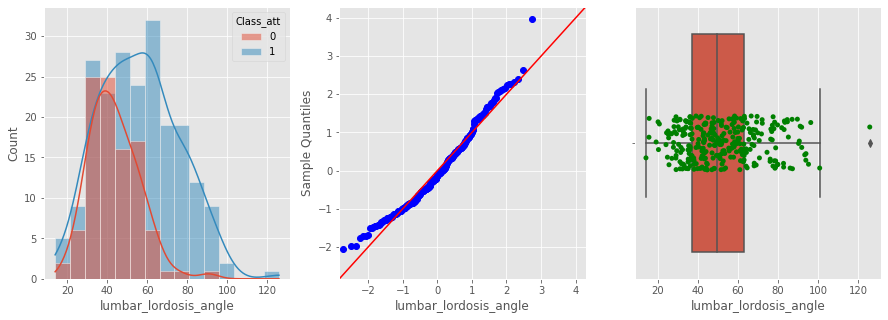

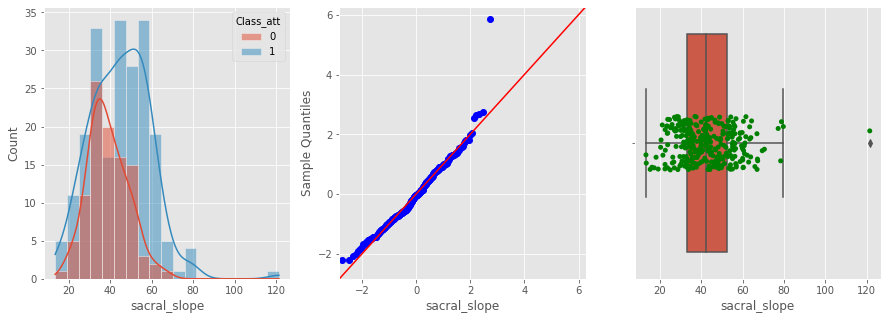

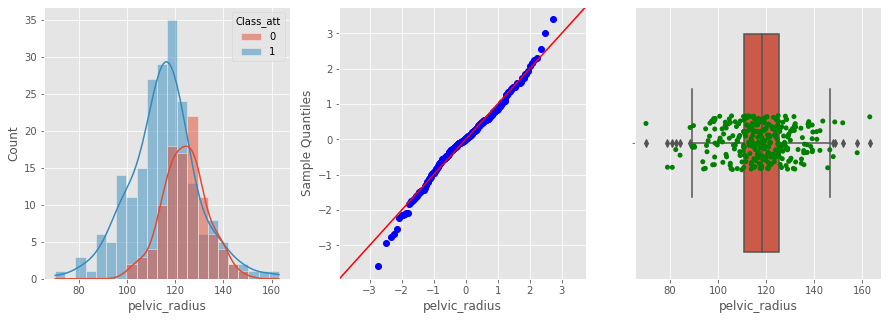

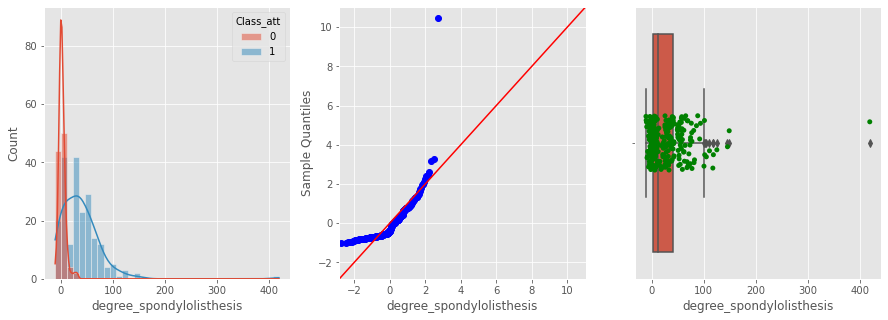

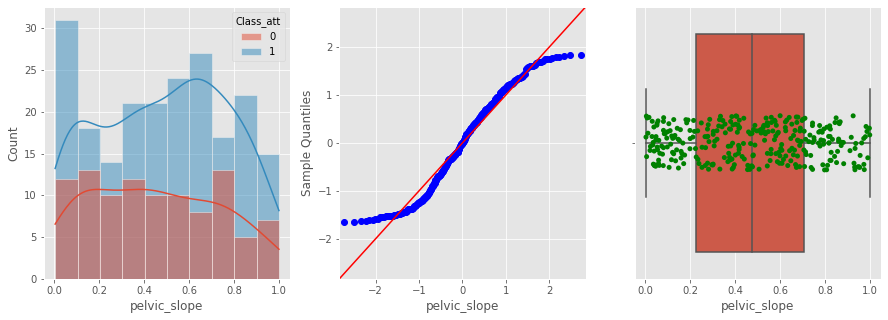

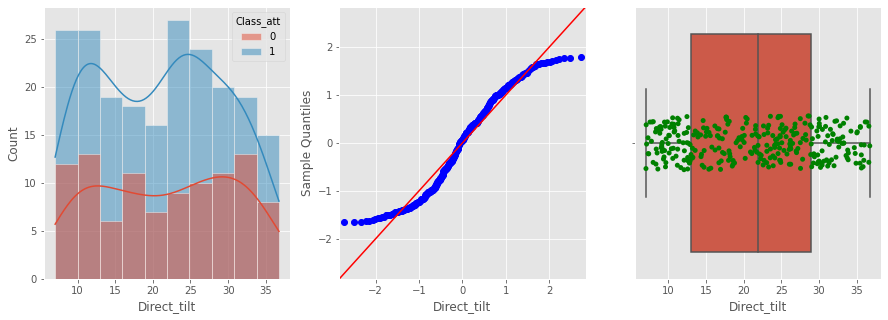

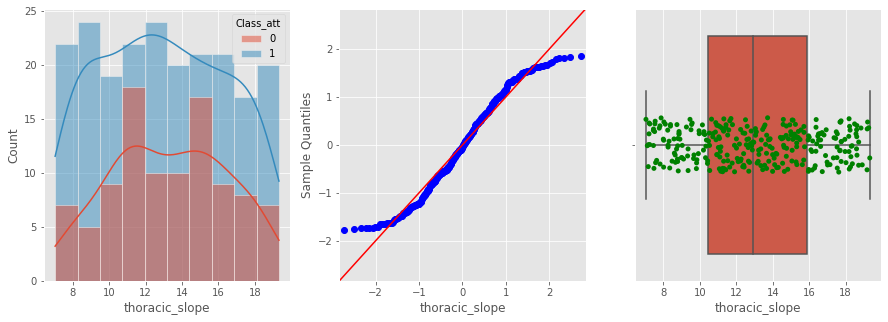

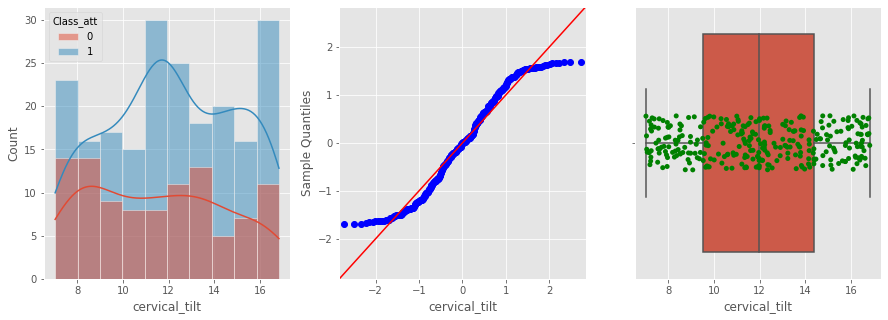

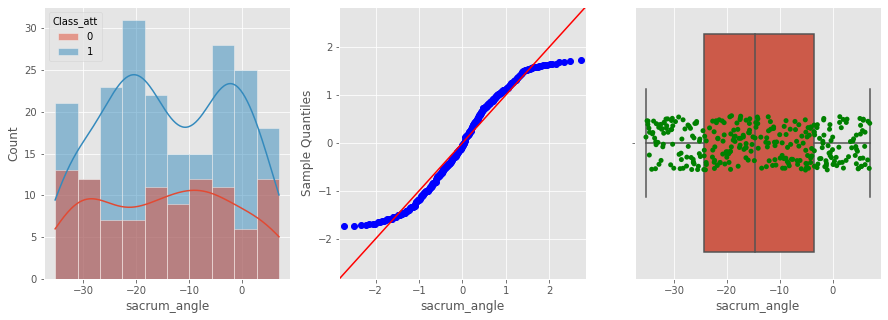

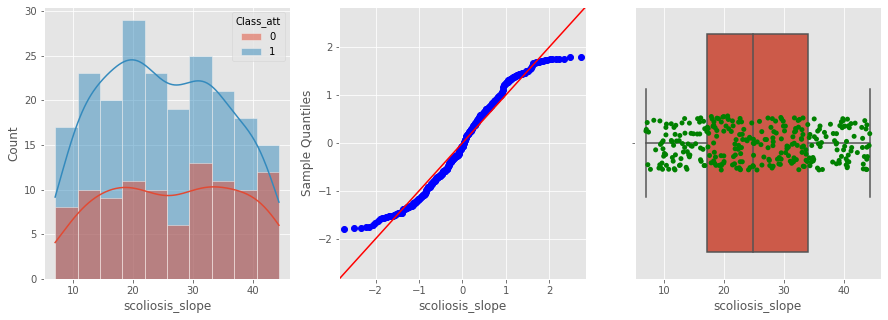

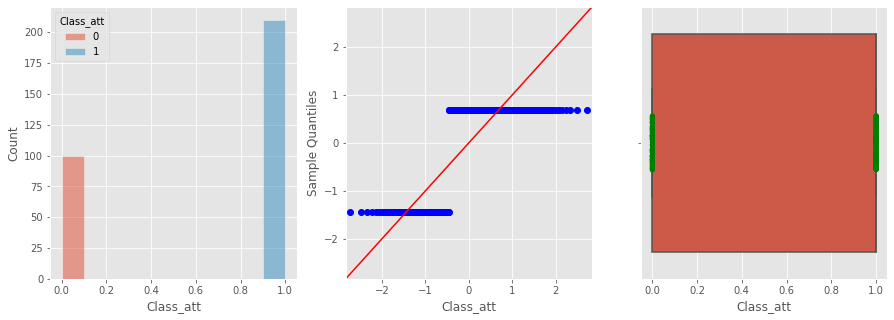

In [18]:
# Check for Normality

for x in collst:
    fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    sns.histplot(data=df, x=x, kde=True, hue=huecol[0], ax=ax[0])
    sm.qqplot(df[x],ax=ax[1],line='45',fit=True)
    ax[1].set_xlabel(x)
    sns.boxplot(data=df,x=x,ax=ax[2])
    sns.stripplot(data=df,x=x,ax=ax[2], color='green')
    plt.show()

#### Feature vs Target Box Plot

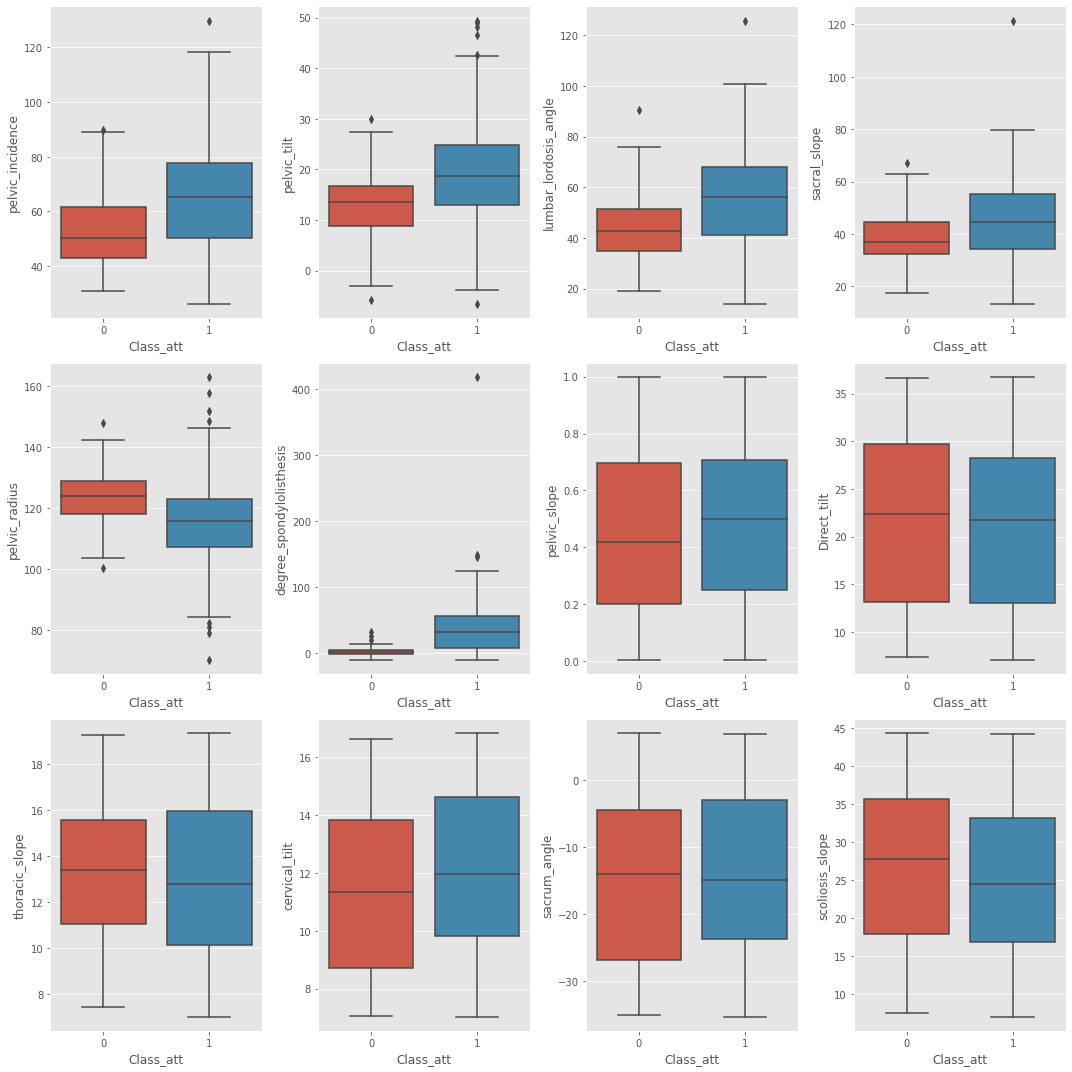

In [19]:
# Box Plot

if len(y_catlst)!= 0:
    NCOLS = 4
    m_rows = int(np.ceil((len(collst)-len(y_catlst))/NCOLS))
    fig, axes = plt.subplots(m_rows, NCOLS, figsize = (15,15))
    axes = axes.flatten()
    for lst in range(0, len(y_catlst), 1):
        temp = 'Fig_0' + str(lst)
        FIG1 = f"{temp}_Boxplot"
        for i in range(0,len(df.columns)-len(y_catlst)):
            sns.boxplot(x=y_catlst[lst], y=df.iloc[:,i], data=df, orient='v', ax=axes[i])
            plt.tight_layout()
if len(y_catlst)== 0:
    FIG1 = r"Fig_01_Boxplot"
    lst = [x for x in collst if x not in y_catlst]
    fig, axes = plt.subplots(1, len(lst), figsize = (45,15))
    axes = axes
    for i, col in enumerate(lst):
        ax = sns.boxplot(y=df[col], ax=axes.flatten()[i])
        axminlt = df[col].min()-0.1*df[col].min()
        axmaxlt = df[col].max()+0.1*df[col].max()
        ax.set_ylim(axminlt, axmaxlt)
        ax.set_ylabel(col)
    plt.tight_layout()

#### Scatter Plots - Optional

In [20]:
# Scatter Plot - Full Dataset

if len(collst) < 12:
    sns.pairplot(df, hue=huecol[0])
else:
    print("Large Feature Set - Refer Scatter Plots with Columns of Interest")

Large Feature Set - Refer Scatter Plots with Columns of Interest


#### Correlation Heatmaps

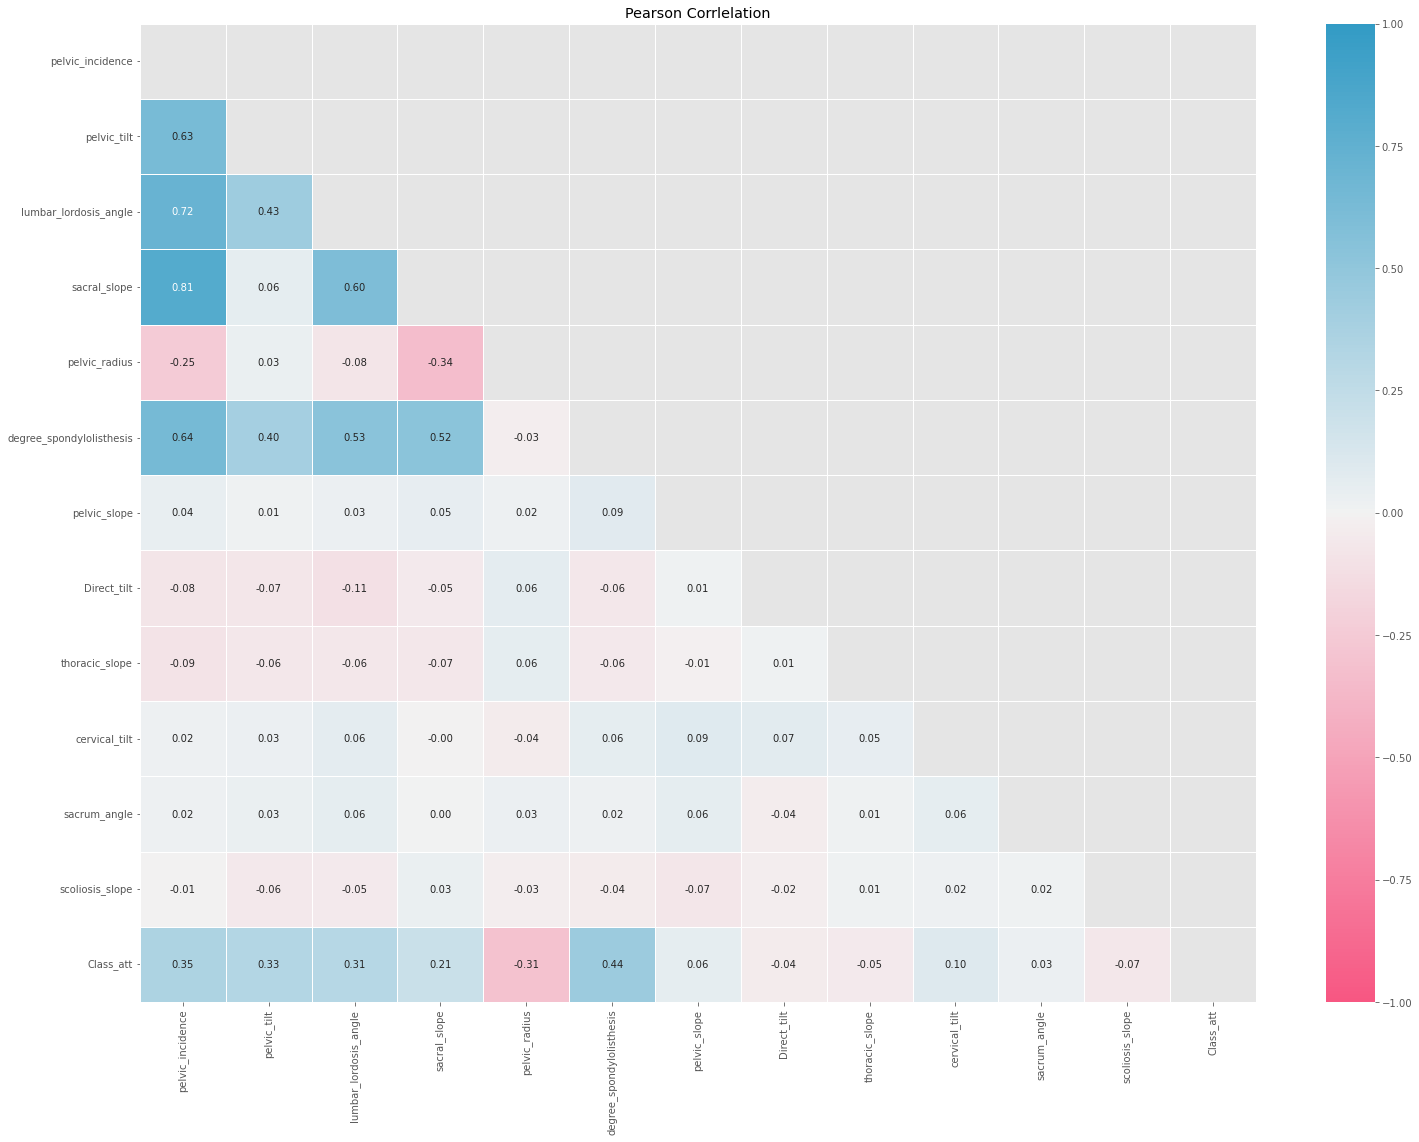

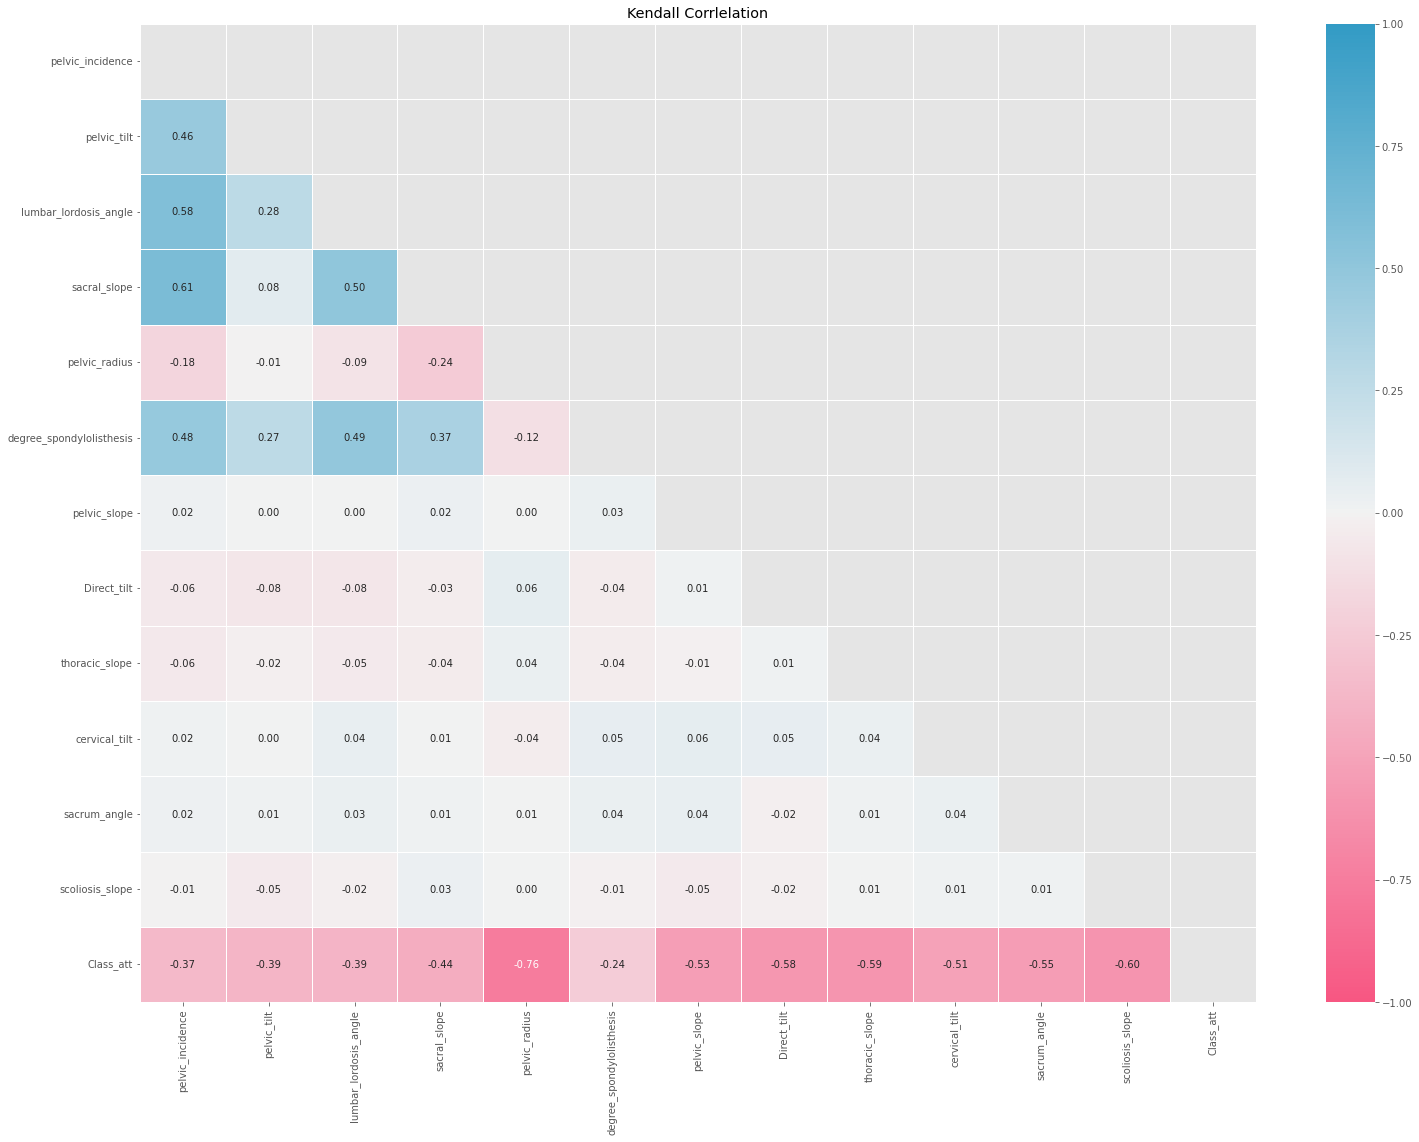

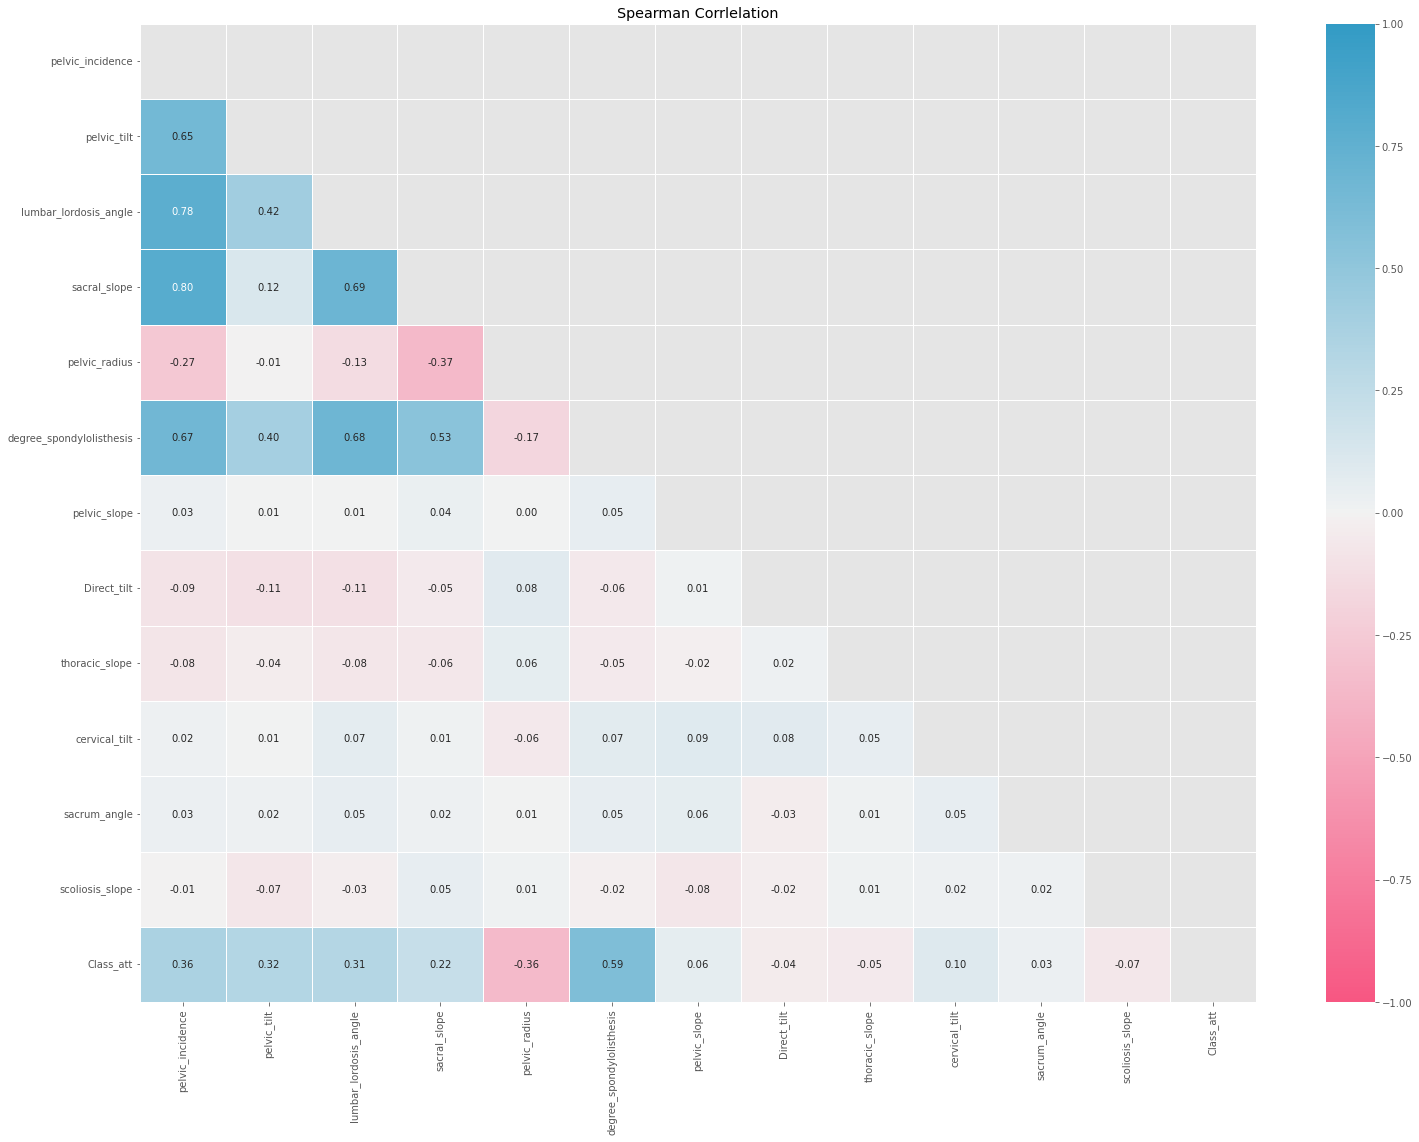

In [21]:
# Linear Correlation Heatmap

cormethod = {0:'pearson', 1:'kendall', 2:'spearman'}
for i in range(0, 3, 1):
    temp = 'linear_cor' + str(i)
    temp = df.corr(method=cormethod[i])
    ftemp = cormethod[i].title()
    FIG2 = r"Fig_02_Corr_"
    mask = np.zeros(temp.shape, dtype=bool)
    mask[np.triu_indices(len(mask))] = True
    plt.subplots(figsize=(25, 18))
    plt.title(f"{ftemp} Corrlelation")
    sns.heatmap(temp, annot=True, vmin=-1, vmax=1, center=0,
                cmap=cmap, square=False, mask=mask, fmt='.2f', linewidth=0.5)
    plt.show()

#### Non-Linear Correlation Heatmaps

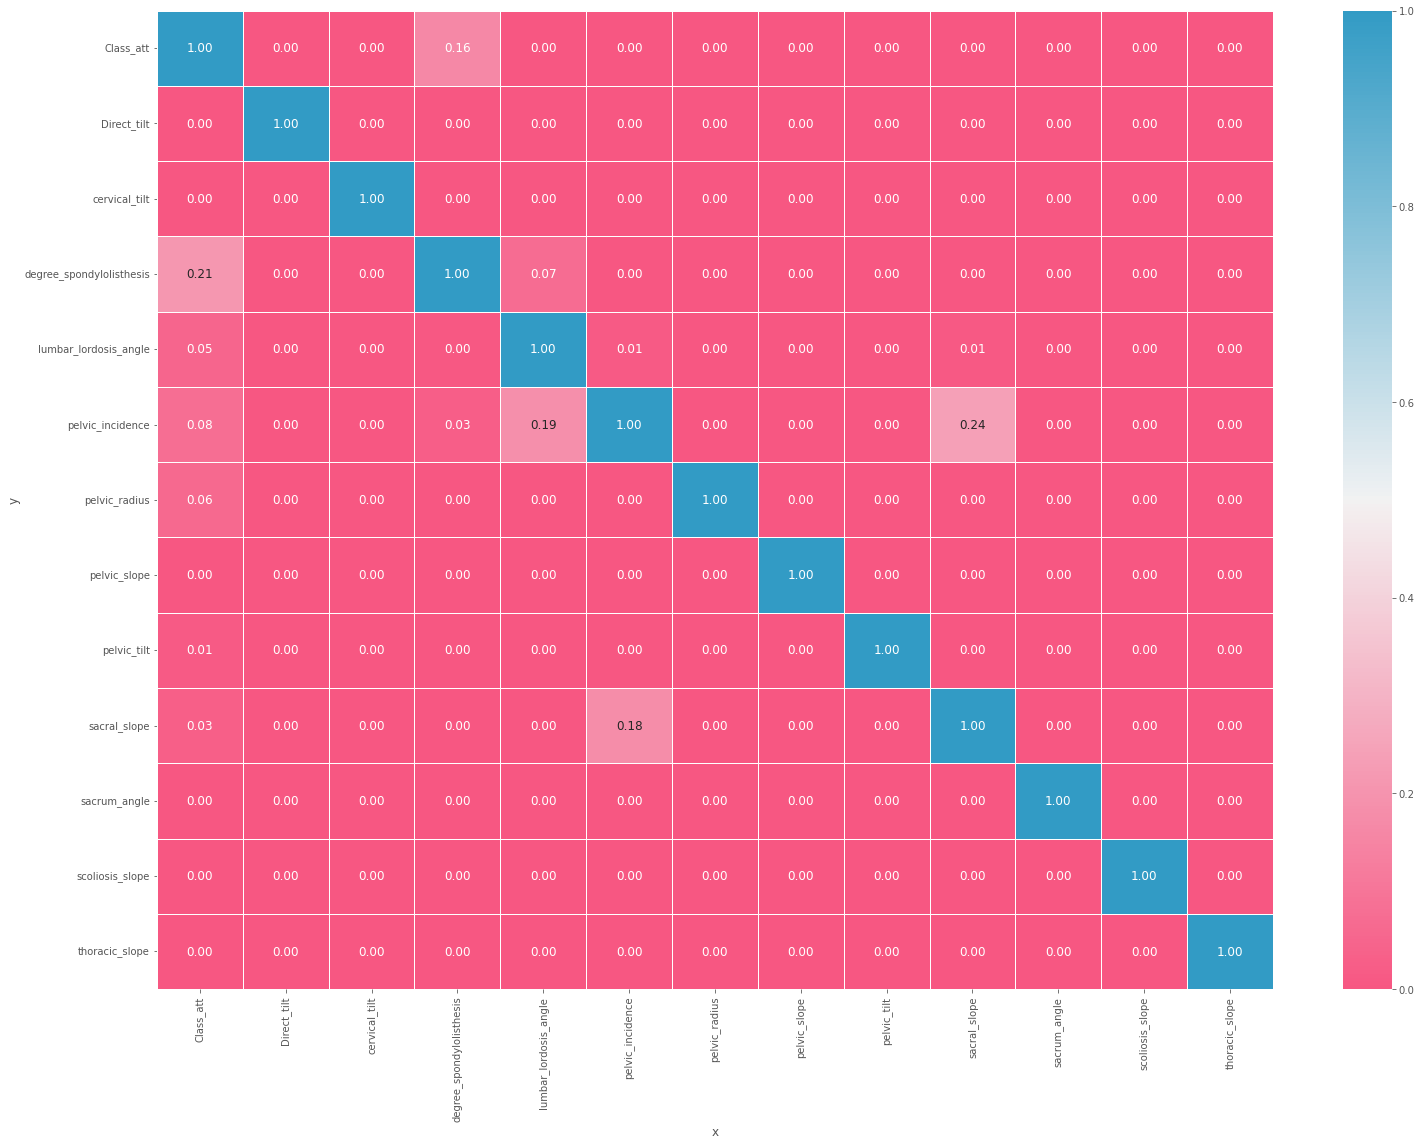

In [22]:
# Non-Linear Correlation Predictive Power Score - Heatmap

ppscorr = pps.matrix(df) # Predictive Power Score - PPS
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y',
                                                        values='ppscore')
plt.subplots(figsize=(25, 18))
sns.heatmap(matrix_df, cmap=cmap, annot=True, linewidth=0.5, annot_kws={"size":12}, fmt='.2f')
plt.show()

#### VIF

In [23]:
# Feature Reduction -  Variance Inflation Factor [VIF]

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [24]:
print("------ Variance Inflation Factor ------")

------ Variance Inflation Factor ------


In [25]:
vif_data.head(len(collst)).round(decimals=2)

,Feature,VIF
0,pelvic_incidence,1.702684e+12
1,pelvic_tilt,1.754456e+11
2,lumbar_lordosis_angle,1.951000e+01
3,sacral_slope,8.714396e+11
4,pelvic_radius,3.530000e+01
5,degree_spondylolisthesis,2.660000e+00
6,pelvic_slope,3.830000e+00
7,Direct_tilt,7.280000e+00
8,thoracic_slope,1.526000e+01
9,cervical_tilt,1.733000e+01


#### Feature Scaling

In [26]:
if n_target == 0:
    X = df.copy()
else:
    X = df.drop(columns=targlst)
    y = df.filter(targlst, axis=1)

scaler = StandardScaler()
# scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

#### Principal Component Analyses

In [27]:
# Principal Component Analyses

# sklpca = SKLPCA(n_components=X.shape[1], svd_solver='full', random_state=RND_STATE)
sklpca = SKLPCA(n_components=0.95, svd_solver='full', random_state=RND_STATE)
sklpca.fit(X_scaled)
X_transform = sklpca.transform(X_scaled)

pricom = pd.DataFrame(sklpca.components_.round(3)) # Principal Components
pricomvar = pd.DataFrame(sklpca.explained_variance_ratio_.round(3))

n_pcs = pricom.shape[0] # Number of Components
topfeat = [np.abs(sklpca.components_[i]).argmax() for i in range(n_pcs)]

# Get the Feature Names
featnames = []
for columns in X.columns:
    featnames.append(columns)

topfeatname = [featnames[topfeat[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): topfeatname[i] for i in range(n_pcs)}

# Build the dataframe
df_topfeat = pd.DataFrame((dic.items()), columns=['PC', 'Feat_Name'])
n_pca_comp = sklpca.n_components_
print("No. of Components Explaining 95% Variance:", n_pca_comp)

No. of Components Explaining 95% Variance: 10


In [28]:
# Top 10 Features from PCA

In [29]:
df_topfeat.head(10)

,PC,Feat_Name
0,PC1,pelvic_incidence
1,PC2,pelvic_radius
2,PC3,cervical_tilt
3,PC4,scoliosis_slope
4,PC5,Direct_tilt
5,PC6,thoracic_slope
6,PC7,sacrum_angle
7,PC8,pelvic_slope
8,PC9,pelvic_tilt
9,PC10,degree_spondylolisthesis


#### Scatter Plot - Columns of Interest 

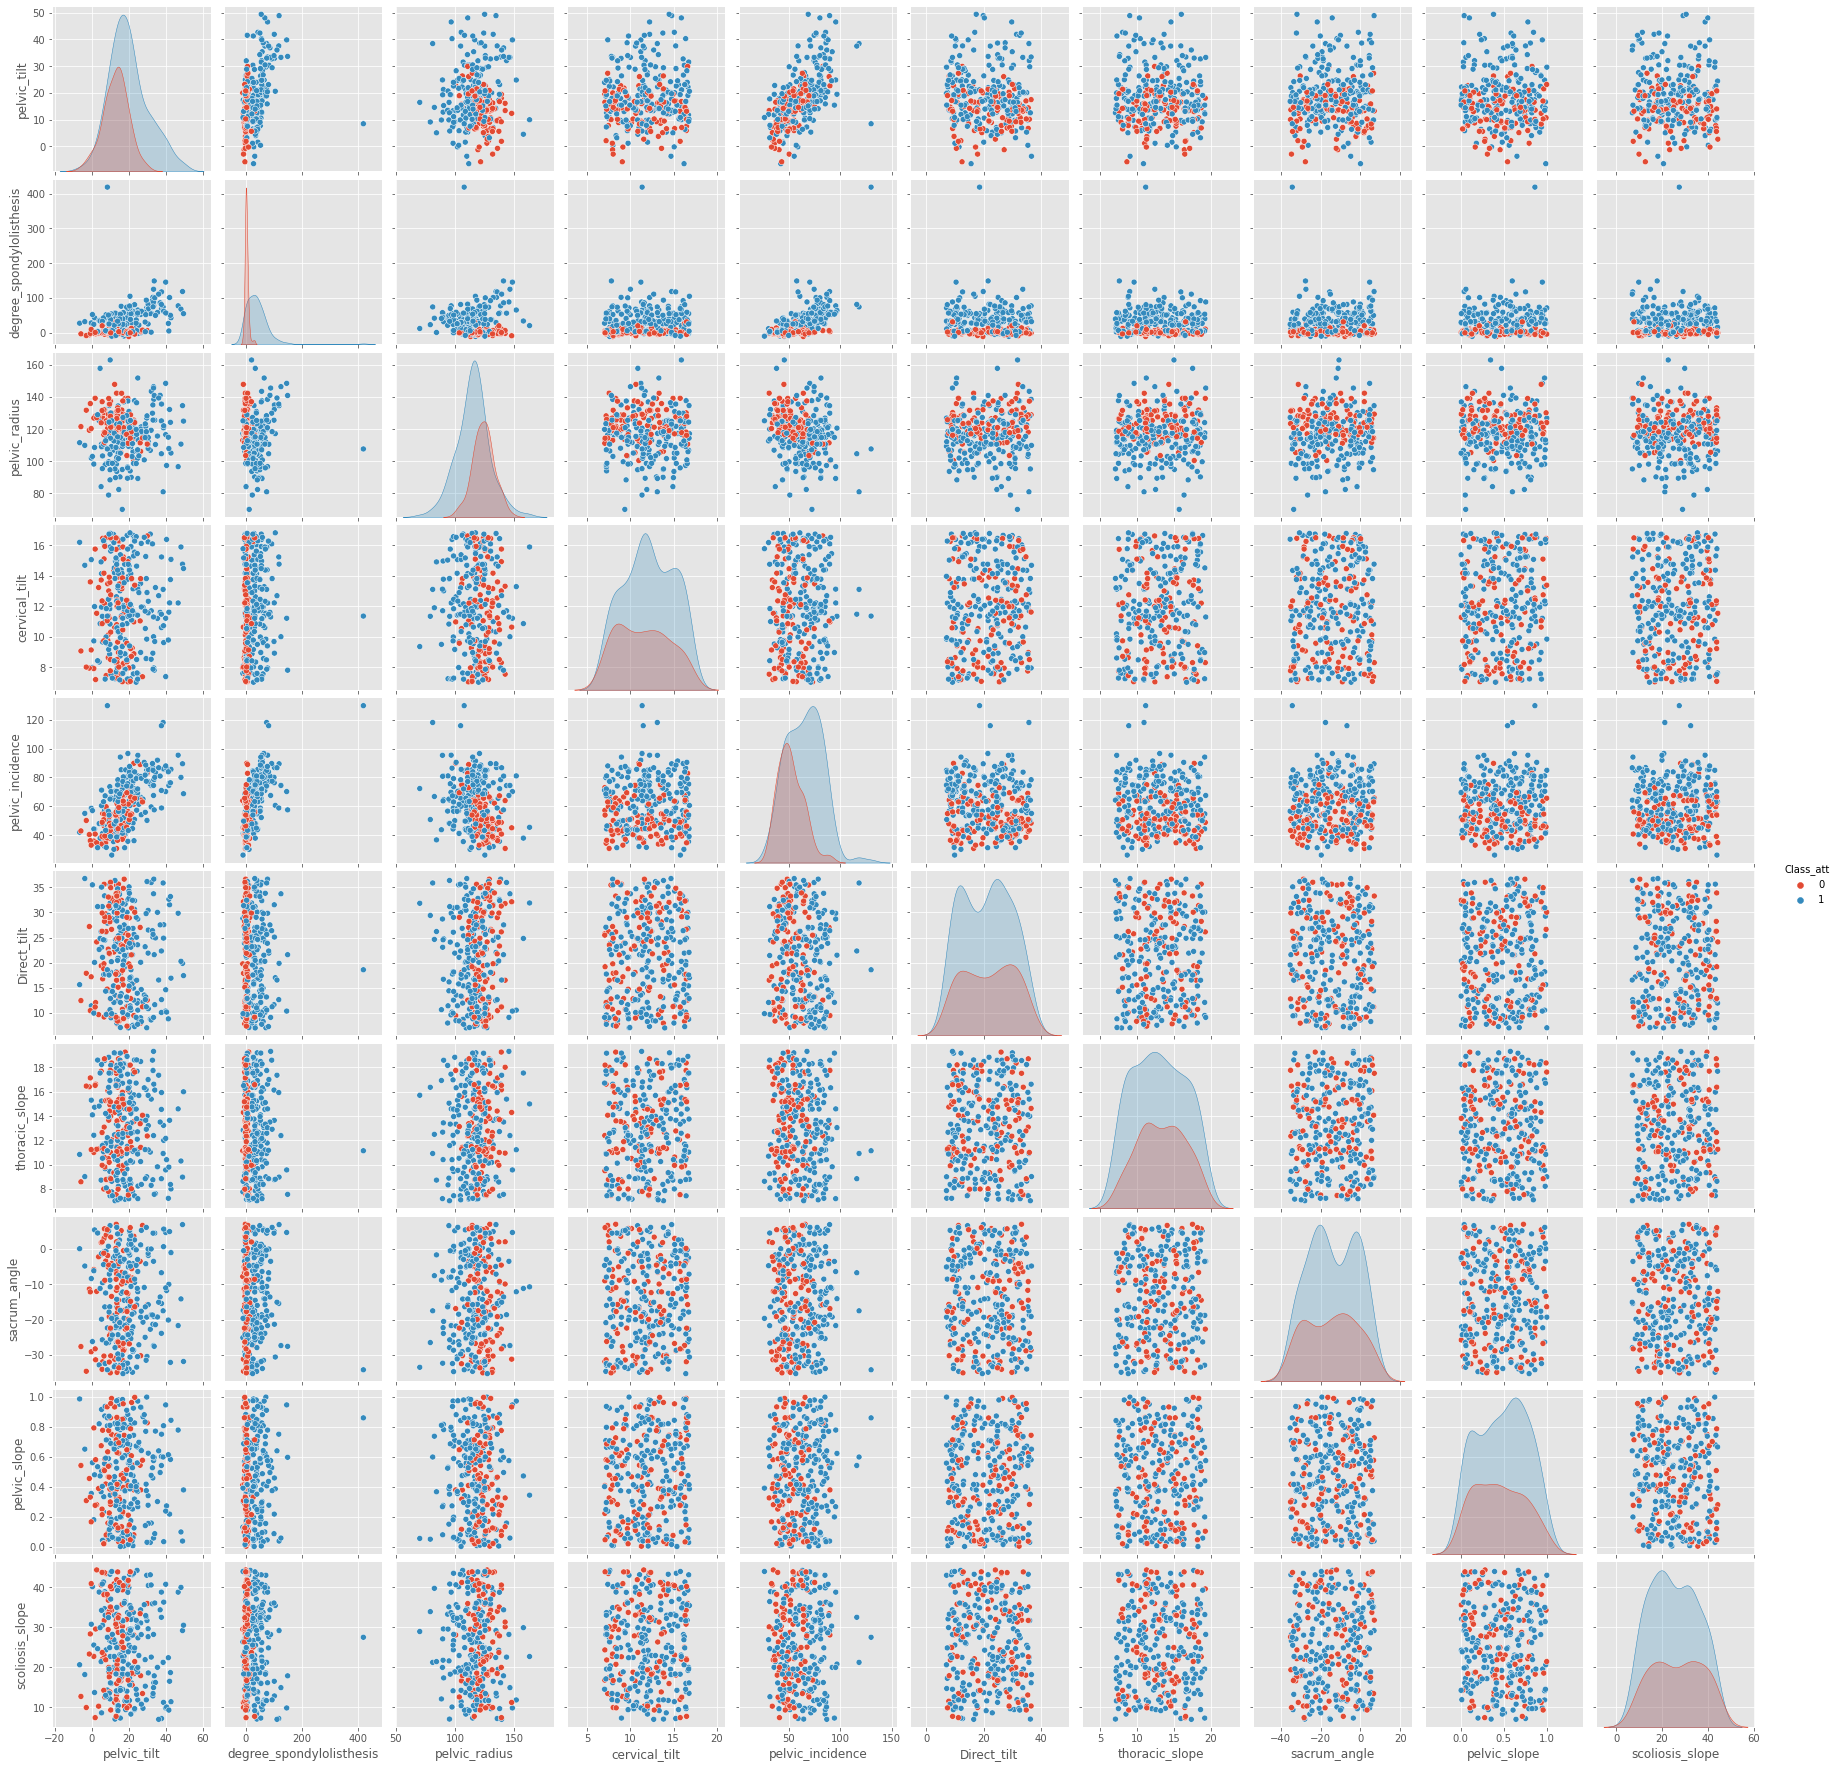

In [30]:
colinterest = df_topfeat['Feat_Name'].to_list()
uniquelst = list(set(colinterest))

for i in range(0, len(targlst), 1):
    temp = targlst[i]
    uniquelst.append(temp)

df_scatter = df.filter(uniquelst)
sns.pairplot(df_scatter, hue=huecol[0])
plt.show()

#### Report Out

##### Output to Excel

In [31]:
SUMMARY = r"Summary.xlsx"

writer = pd.ExcelWriter(f"{OUTPATH}{PREFIX}{SUMMARY}", engine='xlsxwriter', options={'strings_to_numbers': True})
DF_INFO.to_excel(writer, sheet_name='Info')
desc_stat.to_excel(writer, sheet_name='Stats')
vif_data.to_excel(writer, sheet_name='VIF')
pricomvar.to_excel(writer, sheet_name='PCA_VAR')
pricom.to_excel(writer, sheet_name='PCA_Components')
df_topfeat.to_excel(writer, sheet_name='PCA_Top_Features')
writer.save()

##### Export Notebook to HTML

In [33]:
NB_Convert = u" jupyter nbconvert --to html_toc --ExtractOutputPreprocessor.enabled=False --output " # Trailing space required.
NB_Name = u"GS_EDA_V1.1-LowerBackPain.ipynb"
PREFIX_A = PREFIX[:-1]
HTML_Name = PREFIX_A.replace("\\", "") + " " # Trailing space is required.
Names_Concat = NB_Convert + HTML_Name + NB_Name
try:
    if(__IPYTHON__):
        get_ipython().system(Names_Concat)
except NameError:
    pass

[NbConvertApp] Converting notebook GS_EDA_V1.1-LowerBackPain.ipynb to html_toc
[NbConvertApp] Writing 4254135 bytes to EDA_V1.1_LowerBackPain.html
